# Fake News Classification

## Loading Dataset

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
test  = pd.read_csv ("test.csv")

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
print(train.shape)
print(test.shape)

(20800, 5)
(5200, 4)


## Data Preprocessing

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [8]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [10]:
#Handeling missing values
test=test.fillna(' ')
train=train.fillna(' ')

In [11]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [12]:
test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [13]:
# data to single column
train_data=train["title"]+" "+train["author"]+" "+train["text"]
train_data.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2    Why the Truth Might Get You Fired Consortiumne...
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
dtype: object

In [14]:
test_data=test["title"]+" "+test["author"]+" "+test["text"]
test_data

0       Specter of Trump Loosens Tongues, if Not Purse...
1       Russian warships ready to strike terrorists ne...
2       #NoDAPL: Native American Leaders Vow to Stay A...
3       Tim Tebow Will Attempt Another Comeback, This ...
4       Keiser Report: Meme Wars (E995) Truth Broadcas...
                              ...                        
5195    The Bangladeshi Traffic Jam That Never Ends - ...
5196    John Kasich Signs One Abortion Bill in Ohio bu...
5197    California Today: What, Exactly, Is in Your Su...
5198    300 US Marines To Be Deployed To Russian Borde...
5199    Awkward Sex, Onscreen and Off - The New York T...
Length: 5200, dtype: object

## CountVectorizer BAG OF WORDS

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(train_data)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traindataset, train.label, test_size=0.20, random_state=0)

In [17]:
# Modelling Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import numpy as np

In [18]:
nb_classifier = MultinomialNB(alpha = 0.15)
nb_classifier.fit(X_train, y_train)
pred_nb_count = nb_classifier.predict(X_test)
acc_nb_count = metrics.accuracy_score(y_test, pred_nb_count)
print(acc_nb_count)

0.9579326923076923


In [19]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(X_train, y_train)
    pred_tune = nb_classifier_tune.predict(X_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

C:\Users\HP\.conda\envs\GPU_DeepWiNNer\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.00 Score: 0.91010
Alpha: 0.05 Score: 0.95481
Alpha: 0.10 Score: 0.95697
Alpha: 0.15 Score: 0.95793
Alpha: 0.20 Score: 0.95649
Alpha: 0.25 Score: 0.95721
Alpha: 0.30 Score: 0.95697
Alpha: 0.35 Score: 0.95625
Alpha: 0.40 Score: 0.95553
Alpha: 0.45 Score: 0.95433
Alpha: 0.50 Score: 0.95337
Alpha: 0.55 Score: 0.95144
Alpha: 0.60 Score: 0.95096
Alpha: 0.65 Score: 0.95024
Alpha: 0.70 Score: 0.95072
Alpha: 0.75 Score: 0.94856
Alpha: 0.80 Score: 0.94784
Alpha: 0.85 Score: 0.94639
Alpha: 0.90 Score: 0.94543
Alpha: 0.95 Score: 0.94471


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
nb_classifier = MultinomialNB(alpha = 0.15)
nb_classifier.fit(X_train, y_train)
pred_nb_count = nb_classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels=[0,1])

In [22]:
print(acc_nb_count)

0.9579326923076923


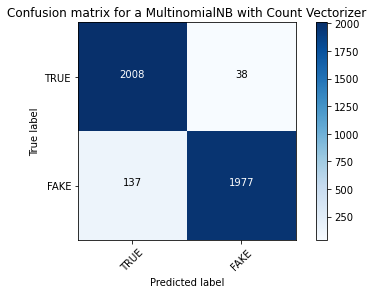

In [23]:
plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')

C:\Users\HP\.conda\envs\GPU_DeepWiNNer\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.9675480769230769


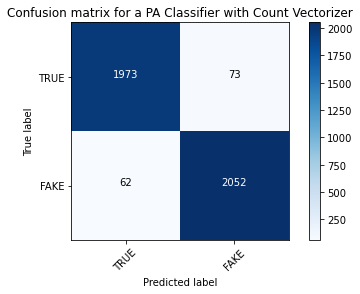

In [24]:
#Passive Agressive Classifier With Count Vectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(X_train, y_train)
pred_linear_count = linear_classifier.predict(X_test)
acc_linear_count = metrics.accuracy_score(y_test, pred_linear_count)
print(acc_linear_count)
cm6 = metrics.confusion_matrix(y_test, pred_linear_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Count Vectorizer')

0.959375


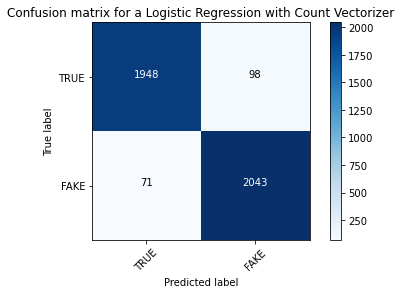

In [25]:
#Logistic Regression with CountVectorizer
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred_logreg_count = logreg.predict(X_test)
acc_logreg_count = metrics.accuracy_score(y_test,pred_logreg_count)
print(acc_logreg_count)
cm3 = metrics.confusion_matrix(y_test, pred_logreg_count, labels=[0,1])
plot_confusion_matrix(cm3, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Count Vectorizer')

## TfidfVectorizer

In [26]:
#Initialize the `tfidf_vectorizer` 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(train_data)
#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(test_data)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_train, train.label, test_size=0.20, random_state=0)

In [28]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(X_train, y_train)
pred_nb_tfidf = nb_classifier.predict(X_test)
acc_nb_tfidf = metrics.accuracy_score(y_test, pred_nb_tfidf)
print(acc_nb_tfidf)

0.9108173076923077


In [29]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,0.1,.01):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(X_train, y_train)
    pred_tune = nb_classifier_tune.predict(X_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f}  Score: {:.5f}".format(alpha, score))

C:\Users\HP\.conda\envs\GPU_DeepWiNNer\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.00  Score: 0.91010
Alpha: 0.01  Score: 0.95240
Alpha: 0.02  Score: 0.94856
Alpha: 0.03  Score: 0.94447
Alpha: 0.04  Score: 0.93822
Alpha: 0.05  Score: 0.93413
Alpha: 0.06  Score: 0.92885
Alpha: 0.07  Score: 0.92548
Alpha: 0.08  Score: 0.92091
Alpha: 0.09  Score: 0.91683


Acc : 0.9524038461538461


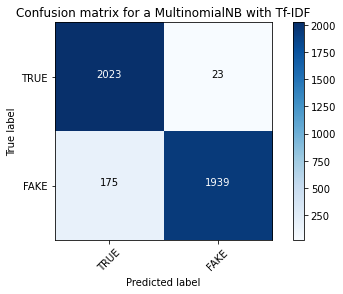

In [30]:
# Let's run the optimized model with best value of hyperparameter and check the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.01)
nb_classifier.fit(X_train, y_train)
pred_nb_tfidf = nb_classifier.predict(X_test)
cm2 = metrics.confusion_matrix(y_test, pred_nb_tfidf, labels=[0,1])
acc_nb_tfidf = metrics.accuracy_score(y_test, pred_nb_tfidf)
print("Acc :",acc_nb_tfidf)
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Tf-IDF')

0.9834134615384615


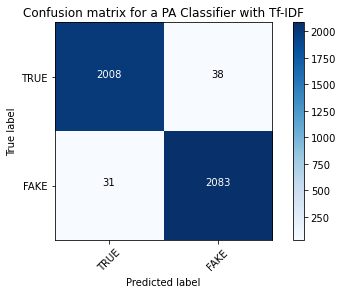

In [31]:
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(X_train, y_train)
pred_linear_tfidf = linear_classifier.predict(X_test)
acc_linear_tfidf = metrics.accuracy_score(y_test, pred_linear_tfidf)
print(acc_linear_tfidf)
cm5 = metrics.confusion_matrix(y_test, pred_linear_tfidf, labels=[0,1])
plot_confusion_matrix(cm5, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Tf-IDF')

C:\Users\HP\.conda\envs\GPU_DeepWiNNer\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.98125


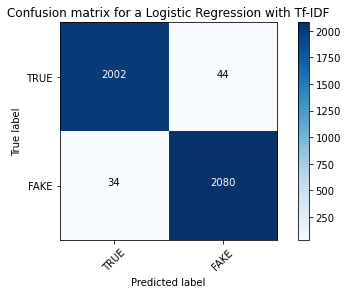

In [32]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred_logreg_tfidf = logreg.predict(X_test)
pred_logreg_tfidf_proba = logreg.predict_proba(X_test)[:,1]
acc_logreg_tfidf = metrics.accuracy_score(y_test,pred_logreg_tfidf)
print(acc_logreg_tfidf)
cm4 = metrics.confusion_matrix(y_test, pred_logreg_tfidf, labels=[0,1])
plot_confusion_matrix(cm4, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Tf-IDF')

## model with highest Acc: "0.9834" is  PassiveAggressiveClassifier   with TfidfVectorizer

In [35]:
pred = linear_classifier.predict(tfidf_test)

In [36]:
len(pred)

5200

In [38]:
submission = pd.read_csv('submit.csv')
submission["label"] = pred
submission.to_csv('submission.csv', index=False)
submission.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1
